In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Import and normalize data.

In [2]:
data = pd.read_csv('ex1/ex1data1.txt', header=None, names=['population', 'profit'])

mins = []
maxs = []

for i in range(data.shape[1]):
    curMin = data.iloc[:, i].min()
    mins.append(curMin)
    data.iloc[:, i] -= curMin
    curMax = data.iloc[:, i].max()
    maxs.append(curMax)
    data.iloc[:, i] /= curMax

Plot data.

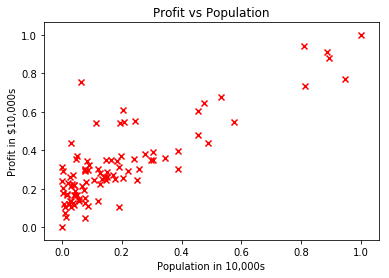

In [3]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='x', c='r')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs Population')
plt.show()

Insert x0 feature.

In [4]:
data.insert(0, 'x0', 1)

In [5]:
data.head()

,x0,population,profit
0,1,0.063064,0.755663
1,1,0.029157,0.440250
2,1,0.203288,0.609173
3,1,0.115061,0.541780
4,1,0.048492,0.354261


m = number of training examples

n = number of features excluding x0

In [6]:
m = data.shape[0]
n = data.shape[1] - 2

feature_vectors is a list of vectors, each of which contains all features including x0.

In [7]:
feature_vectors = [data.iloc[i, :n + 1].values for i in range(m)]

In [8]:
feature_vectors

[array([ 1.        ,  0.06306437]),
 array([ 1.        ,  0.02915679]),
 array([ 1.        ,  0.20328829]),
 array([ 1.        ,  0.11506104]),
 array([ 1.       ,  0.0484918]),
 array([ 1.        ,  0.19538778]),
 array([ 1.        ,  0.14261095]),
 array([ 1.        ,  0.20675241]),
 array([ 1.        ,  0.08496108]),
 array([ 1.        ,  0.00161271]),
 array([ 1.        ,  0.03981113]),
 array([ 1.        ,  0.53196593]),
 array([ 1.        ,  0.04116767]),
 array([ 1.       ,  0.1968724]),
 array([ 1.       ,  0.0357357]),
 array([ 1.       ,  0.0205227]),
 array([ 1.        ,  0.07792805]),
 array([ 1.        ,  0.00600835]),
 array([ 1.       ,  0.0816658]),
 array([ 1.        ,  0.11899675]),
 array([ 1.        ,  0.06766379]),
 array([ 1.       ,  0.8874599]),
 array([ 1.        ,  0.02696771]),
 array([ 1.        ,  0.07563999]),
 array([ 1.        ,  0.03132259]),
 array([ 1.        ,  0.81031783]),
 array([ 1.        ,  0.45418343]),
 array([ 1.      ,  0.345253]),
 array([

params is a vector containing the parameters.

In [9]:
params = np.zeros(n + 1)

evalHypothesisAt() evaluates the hypothesis at a certain index in the feature_vectors.

In [10]:
def evalHypothesisAt(i):
    return np.dot(params, feature_vectors[i])

output_vector contains all the output values.

In [11]:
output_vector = data.iloc[:, n + 1].values

evalCost() evaluates the cost function.

In [12]:
def evalCost():
    csum = 0
    for i in range(m):
        csum += (evalHypothesisAt(i) - output_vector[i])**2
    return csum/(2*m)

In [13]:
def gradDesc(alpha):
    global params
    sumX = np.zeros(n+1)
    for i in range(m):
        sumX += (evalHypothesisAt(i) - output_vector[i])*np.asarray(feature_vectors[i])
    params = params - (alpha/m)*sumX

Store the cost function and iterations to plot them later, and apply gradient descent.

In [14]:
cost = []
iters = []
for i in range(1000):
    cost.append(evalCost())
    iters.append(i)
    gradDesc(0.5)

Evaluate the hypothesis at all points in the training set, and plot the line.

[ 0.17825531  0.7638249 ]


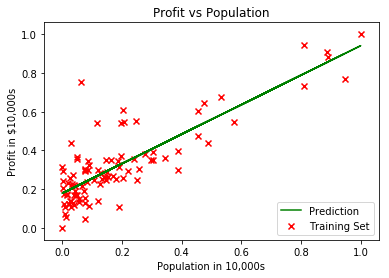

In [15]:
ar = []
for k in range(m):
    ar.append(evalHypothesisAt(k))
    
print(params)
plt.plot(data.iloc[:, 1], ar, color = 'g', label='Prediction')
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c='r', marker='x', label='Training Set')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs Population')
plt.legend(loc=4)
plt.show()

Additional: plot cost function against iterations.

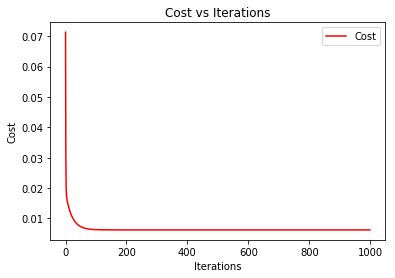

In [16]:
plt.plot(iters, cost, color='r', label='Cost')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Cost vs Iterations')
plt.legend()
plt.show()

Additional: plot cost function (normalized) for various parameter values as a surface plot.

In [17]:
temp = params
x = np.linspace(-10, 10, 100)
y = np.linspace(-1, 4, 100)
x, y = np.meshgrid(x, y)
z = []
for i in range(len(x)):
    l = []
    for j in range(len(x[i])):
        params = [x[i][j], y[i][j]]
        l.append(evalCost())
    z.append(l)
params = temp

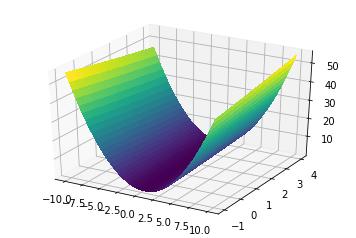

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap = cm.viridis, linewidth=0, antialiased=False)
plt.show()

Revert data and prediction to original (non-normalized state).

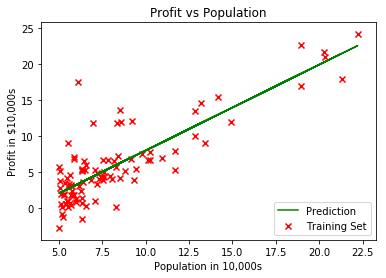

In [19]:
data = pd.read_csv('ex1/ex1data1.txt', header=None, names=['population', 'profit'])

tsum = 0
for i in range(n):
    tsum += ((params.flat[i + 1] * mins[i])/maxs[i])

params.flat[0] = (maxs[n] * (params.flat[0] - tsum)) + mins[n]

for i in range(1, n + 1):
    params.flat[i] = (params.flat[i] * maxs[n])/maxs[i - 1]

ar = []
for k in range(m):
    ar.append(np.dot(params, [1, data.iloc[k, :n]]))

plt.plot(data.iloc[:, 0], ar, color = 'g', label='Prediction')
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c='r', marker='x', label='Training Set')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs Population')
plt.legend(loc=4)
plt.show()